<a href="https://colab.research.google.com/github/LuisMongeB/Spotify-Genre-Prediction/blob/main/spotify_genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Musical Classifiers

In this notebook we build classifiers to predict the *gender* of a *song* using attributes computed from the *Spotify* API.


<table align='left'>
<tr>
<td><img src='http://jricardon.github.io/spambase/spotify.png' width='800'/> </td>
</tr>
</table>


# Ethics & Teamwork

The following project is an original work of discussion, analysis and conclusion as part of the Machine Learning for Classification course in the Master in Data Science & Business Analytics at Bologna Business School (BBS).

# Data

We will use data from the *Spotify Tracks* database available at *kaggle.com*, an online community of data scientists and machine learning practitioners. 

> *https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db*

It contains information of 232,725 tracks classified into 26 non-exclusive genres. Different audio features have been extracted for each track using the Spotify Tracks API 

> *https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features*

These musical features are: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo. Besides we have: the track_name, the artist_name, the track_id and the track popularity.
The first may be encoded using text representation techniques but if you are not familiar with them, you can exclude these attributes from the analysis. Of course, the track_id should not be used as a predictor (why?).





# Data Download

The code below reads the csv file (comma separated values) and creates a pandas dataframe with the info we have about the tracks. There was a problem with the class "Children’s Music" that existed in two variants: "Children’s Music" and "Children's Music".   



In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

data = pd.read_csv(name)
data = data.dropna()
print(data.columns)

genres = np.unique([str(item) for item in data['genre'].values])
print("Genre (Raw)\n", genres)
print("")
data.loc[data['genre']=="Children’s Music", 'genre'] = "Children's Music"
genres = np.unique([str(item) for item in data['genre'].values])
print("Genre (Fixed)\n", genres)
print("")

full_data = data.copy()


FileNotFoundError: ignored

# Basic Exploratory Data Analysis

## Songs by Genre

In [ ]:
gr = data.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,10),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Songs by Genre')
plt.show()

## Popular Artists

In [ ]:
gr = data.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularity').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularity', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Most Popular Artists')
plt.show()

print("")

## Some Tracks

In [ ]:
#indices = data.index[(data['genre'] == 'Rock')].tolist()
#indices = data.index[(data['genre'] == 'Pop') & (data['artist_name'] == 'Ed Sheeran')].tolist()
indices = data.index[(data['genre'] == 'Rock') & (data['artist_name'] == 'The Beatles')].tolist()
#indices = data.index[(data['genre'] == 'Jazz') & (data['track_name'] == 'The Girl From Ipanema')].tolist()
test_idx = np.random.choice(indices, 1)

print("\nSong: ", data.loc[test_idx]['track_name'].values[0])
print("Artist: ", data.loc[test_idx]['artist_name'].values[0])
print("Ground Truth:",data.loc[test_idx]['genre'].values[0])

## Select a Subset of Genres

In [ ]:
# select 2
# selected_genres = ['Classical','Electronic'] 

# select 5
selected_genres = ['Classical','Electronic','Jazz','Rock','Rap']

not_selected_genres = [genre for genre in genres if genre not in selected_genres]
genres = selected_genres

data = full_data[full_data['genre'].isin(selected_genres)]

gr = data.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,2),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Number of tracks per selected genre')
plt.show()


genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

for genre in genres:
  data.loc[data['genre'] == genre, 'class'] = genre_to_number[genre]


## Distribution of the Attributes

In [ ]:
#playlist_name no
print(data.columns)

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']

#major = 1
#minor = 0
#(1,0,0,0,0,0,0,0,0,0,0,0,0)
print(len(cont_predictors_names))

#dummies = pd.get_dummies(df['Category'])

fig, axes = plt.subplots(figsize=(16,12), nrows=3, ncols=4)
for i, column in enumerate(cont_predictors_names):
    for genre in genres:
      target = data.loc[data['genre'] == genre]
      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=genre)
      if i==0:
        axes[0,0].legend()

plt.show()

fig, axes = plt.subplots(figsize=(16,4), nrows=1, ncols=4)
for i, column in enumerate(cat_predictors):
  df_gb = data.groupby([column, 'class']).size().unstack(level=1)
  df_gb.plot(kind = 'bar',ax=axes[i%4])

plt.show()

fig, ax = plt.subplots(figsize=(16,4), nrows=1, ncols=1)
df_gb = data.groupby(['key', 'class']).size().unstack(level=1)
df_gb.plot(kind = 'bar',ax=ax)
plt.show()



## Boxplots

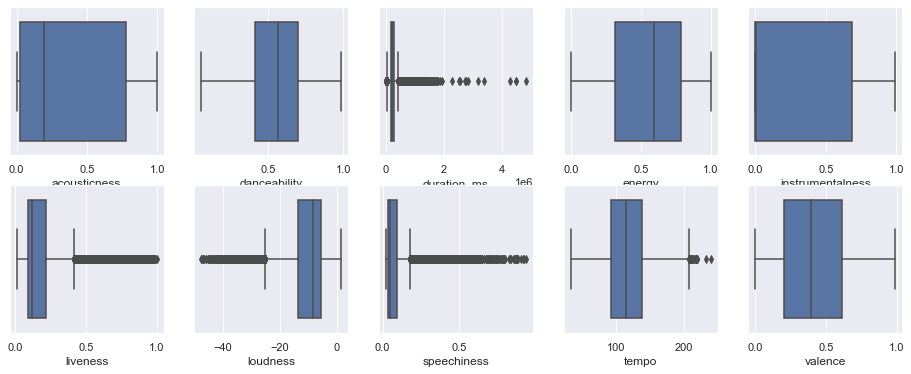

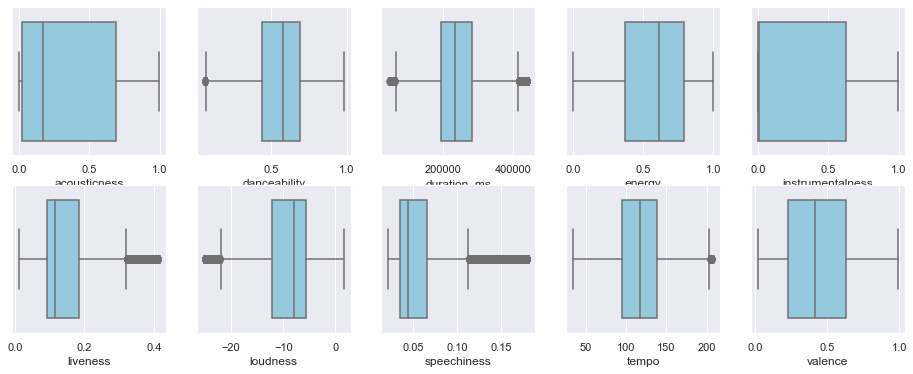

In [ ]:

fig, axes = plt.subplots(figsize=(16,6), nrows=2, ncols=5)
for i, column in enumerate(cont_predictors_names):
      sns.boxplot(x=data[column],ax=axes[i//5,i%5])

plt.show()

Q1 = data[cont_predictors_names].quantile(0.25)
Q3 = data[cont_predictors_names].quantile(0.75)
IQR = Q3 - Q1

filter = ((data[cont_predictors_names] < (Q1 - 1.5 * IQR)) | (data[cont_predictors_names] > (Q3 + 1.5 * IQR))).any(axis=1)

data_filtered = data[~filter].copy()
fig, axes = plt.subplots(figsize=(16,6), nrows=2, ncols=5)
for i, column in enumerate(cont_predictors_names):
      sns.boxplot(x=data_filtered[column],ax=axes[i//5,i%5],color="skyblue")

plt.show()

In [ ]:
data_filtered.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,class
22170,Electronic,DJ Snake,Let Me Love You,0lYBSQXN6rCTvUZvg9S0lU,82,0.0771,0.652,205947,0.713,0.000010,G#,0.1440,-5.311,Major,0.0368,100.023,4/4,0.152,3.0
22171,Electronic,RL Grime,UCLA,3OaunNUlXXs5e2PXtNAzzG,70,0.0742,0.536,192000,0.879,0.000000,C#,0.0847,-3.019,Major,0.0621,140.137,4/4,0.334,3.0
22172,Electronic,DJ Snake,Middle,0g5EKLgdKvNlln7TNqBByK,78,0.0203,0.586,220573,0.701,0.000000,C#,0.0550,-5.326,Minor,0.0416,104.957,4/4,0.254,3.0
22174,Electronic,Daft Punk,One More Time,0DiWol3AO6WpXZgp0goxAV,74,0.0193,0.611,320357,0.697,0.000000,D,0.3320,-8.618,Major,0.1330,122.752,4/4,0.476,3.0
22175,Electronic,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,2Foc5Q5nqNiosCNqttzHof,76,0.0426,0.794,248413,0.811,0.000001,F#,0.1010,-8.966,Minor,0.0380,116.047,4/4,0.862,3.0


# Basic Pre-processing

Since for the most part I'll be using GridSearchCV and therefore Cross-Validation, will not split the data into train,validation and test but just in *train and test*:

In [ ]:
from sklearn.preprocessing import StandardScaler

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']

cont_features = data[cont_predictors_names]
dummy_key = pd.get_dummies(data['key'],prefix='key')
dummy_mode = pd.get_dummies(data['mode'],prefix='mode')
dummy_signature = pd.get_dummies(data['time_signature'],prefix='time_sign')
binary_features = pd.concat([dummy_key,dummy_signature],axis=1)
binary_features = pd.concat([binary_features,dummy_mode],axis=1)
binary_predictors_names = binary_features.columns#names 

X = cont_features
y = data['class']
info = data[other_predictors]

print("X,y Shapes:", X.shape, y.shape)

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=3,include_bias=False)
#result = poly.fit_transform(cont_features.values)
#cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]
#X = pd.DataFrame(result, columns = cont_predictors_names)
print("Binary Features Shapes:", binary_features.shape)

X = pd.concat([X.reset_index(drop=True),binary_features.reset_index(drop=True)],axis=1)

#X = pd.concat([X.reset_index(drop=True),text_features.reset_index(drop=True)],axis=1)
print("X,y Shapes:", X.shape, y.shape)
#scaler = StandardScaler()
#X[cont_predictors_names] = scaler.fit_transform(X[cont_predictors_names])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.5, random_state=0)
# X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.5, random_state=0)

print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
# print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

scaler = StandardScaler()
#Z = X-mu/sigma

X_train[cont_predictors_names] = scaler.fit_transform(X_train[cont_predictors_names])
# X_val[cont_predictors_names] = scaler.transform(X_val[cont_predictors_names])
X_test[cont_predictors_names] = scaler.transform(X_test[cont_predictors_names])


X,y Shapes: (46578, 10) (46578,)
Binary Features Shapes: (46578, 19)
X,y Shapes: (46578, 29) (46578,)
X,y Shapes: (46578, 29) (46578,)
X,y Train Shapes: (23289, 29) (23289,)
X,y Test Shapes: (23289, 29) (23289,)


In [ ]:
X_train.head()

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,acousticness^2,acousticness^1xdanceability^1,acousticness^1xduration_ms^1,acousticness^1xenergy^1,acousticness^1xinstrumentalness^1,acousticness^1xliveness^1,acousticness^1xloudness^1,acousticness^1xspeechiness^1,acousticness^1xtempo^1,acousticness^1xvalence^1,danceability^2,danceability^1xduration_ms^1,danceability^1xenergy^1,danceability^1xinstrumentalness^1,danceability^1xliveness^1,danceability^1xloudness^1,danceability^1xspeechiness^1,danceability^1xtempo^1,danceability^1xvalence^1,duration_ms^2,duration_ms^1xenergy^1,duration_ms^1xinstrumentalness^1,duration_ms^1xliveness^1,duration_ms^1xloudness^1,duration_ms^1xspeechiness^1,duration_ms^1xtempo^1,duration_ms^1xvalence^1,energy^2,energy^1xinstrumentalness^1,energy^1xliveness^1,...,liveness^1xtempo^1xvalence^1,liveness^1xvalence^2,loudness^3,loudness^2xspeechiness^1,loudness^2xtempo^1,loudness^2xvalence^1,loudness^1xspeechiness^2,loudness^1xspeechiness^1xtempo^1,loudness^1xspeechiness^1xvalence^1,loudness^1xtempo^2,loudness^1xtempo^1xvalence^1,loudness^1xvalence^2,speechiness^3,speechiness^2xtempo^1,speechiness^2xvalence^1,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_sign_1/4,time_sign_3/4,time_sign_4/4,time_sign_5/4,mode_Major,mode_Minor
17786,1.106560,-0.582249,-1.327447,-0.559828,1.145483,1.119057,-0.496534,-0.563272,-0.617679,1.355519,1.183064,1.051887,-0.456997,1.680643,1.587255,2.511055,-0.703765,0.123229,0.876937,3.109704,-0.710022,-1.295246,-0.730182,0.583330,0.383371,-0.347335,-0.551637,-0.743462,0.253279,-0.417525,-0.999125,-0.525811,-0.450844,0.702746,-0.884883,-1.368671,-0.569987,-0.773388,0.376424,-0.013223,...,1.452143,2.104491,0.034827,-0.181730,0.130948,1.768876,0.205112,0.365448,-0.381171,0.013175,-1.769667,-2.268392,-0.183796,-0.306356,-0.240955,-0.530047,-0.249062,-0.010587,-0.685184,0.245045,0.769350,0.927227,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16941,1.108837,-0.681462,0.057425,-0.571278,0.043142,-0.205269,-0.221040,-0.536472,1.176421,1.059458,1.187507,0.926313,0.724498,1.645239,0.471372,0.633719,-0.481122,0.182950,1.987163,2.687230,-0.778445,-0.392102,-0.759271,-0.204240,-0.423622,0.035139,-0.551397,-0.226939,0.044789,-0.089826,-0.434207,-0.000320,-0.106927,-0.137512,-0.491747,0.630911,1.194200,-0.779552,-0.149811,-0.435212,...,0.539899,0.328926,0.252932,-0.278791,0.302355,0.949634,0.206028,0.106147,-0.194943,-1.348166,-2.328506,-1.350057,-0.183439,-0.289890,-0.240538,-0.245843,-0.068124,-0.089250,1.133654,1.758325,1.127734,0.485672,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6285,-0.981189,0.707515,-0.446401,0.685342,-1.211399,-0.467693,1.139758,-0.320792,-0.433933,-0.822646,-0.978081,-0.790834,-0.702443,-0.425674,-0.805348,-0.633857,0.909778,-0.668932,-0.925033,-0.646446,0.575104,0.032910,0.712271,-0.987686,-0.229426,0.993988,-0.165877,0.237062,-0.603239,-0.258738,0.217444,-0.860836,-0.445241,0.801606,-0.456981,-0.570190,-0.787973,0.456573,-0.726420,-0.166067,...,-0.590913,-0.505755,0.640320,-0.627194,-0.830749,-0.631640,0.231741,0.761756,0.584577,0.961455,0.851316,0.585222,-0.178567,-0.270438,-0.262696,-0.391902,-0.507973,-0.480917,-0.567967,-0.768229,-0.669268,-0.535814,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
10683,0.851596,0.320113,0.115440,-0.940536,-0.807968,-0.125931,-0.177814,-0.364183,-0.845919,0.120521,0.714210,1.841647,0.595874,0.275704,-0.439864,0.580161,-0.287153,0.408980,0.531325,1.101413,0.111894,0.440969,-0.815773,-0.568224,-0.012318,-0.974552,-0.279130,-0.260959,0.040937,-0.066727,-0.776305,-0.574291,-0.023096,-0.145670,-0.272145,-0.271937,0.316318,-0.928097,-0.636317,-0.566063,...,-0.231447,-0.195107,0.281515,-0.153908,-0.212420,0.263068,0.160224,0.269024,-0.044967,0.344712,-0.181757,-0.081950,-0.179871,-0.283975,-0.233364,-0.480629,-0.345473,-0.295589,-

# **Binary Models**

Please train and evaluate your binary models here. Execute all the previous cells before. In particular be sure you select the 2 genres/classes you want to classify in the section "Select a Subset of Genres"

Train binary SVMs to classify the Classical music from Electronic music. In particular.

1. Train a linear soft-margin SVM selecting the optimal value of the regularization parameter  𝐶 .
2. Train a non-linear SVM selecting a good kernel.
3. Evaluate the classifiers giving an estimate of their prediction error.
4. Assess the effect of the different audio attributes in the decisions of your model.

1.   Train a linear soft-margin SVM selecting the optimal value of the regularization parameter $C$.

To check for the optimal value of C we can use a for-loop as done in "BBS21_SVM_hard_vs_soft.ipynb" notebook:

## Selecting best parameters for Linear SVM with GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
base = SVC()

grid_values = {'C': np.logspace(-10, 5, num=32, endpoint=True, base=2.0), 'kernel':['linear']}
grid_search_svc = GridSearchCV(base, param_grid = grid_values, scoring = 'accuracy', cv=5)
#Fitting the model
print("Fitting the model: ")
print("\n")
grid_search_svc.fit(X_train, y_train)
# Extracting best params
best_params = grid_search_svc.best_params_

print("The best params are: ", best_params)


NameError: ignored

Will therefore initialize a new model with the optimal parameters found above:

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support

svm = SVC(kernel='linear', C=0.00522)
svm.fit(X_train, y_train)

w = svm.coef_[0]
b = svm.intercept_[0]
margin = 1 / np.sqrt(w[0]**2+w[1]**2)


y_best_preds = svm.predict(X_test)

<Figure size 720x432 with 0 Axes>

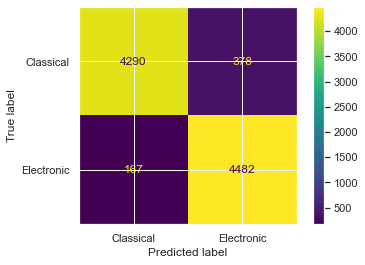

In [ ]:
plt.figure(figsize=(10,6))
plot_confusion_matrix(svm, X_test, y_test, display_labels=selected_genres)

Will calculate the accuracy manually:
    
    Accuracy = TP + TN / (TP + FN + TN + FP)
    
    Accuracy = (4290 + 4482) / (4290 + 4482 + 167 + 378)
    
The accuracy of the linear model is 0.9414 or **94,14%**

w:  [-0.75458163  0.62759552  0.00273116  0.22105934  0.11683191 -0.01545124
  0.32093713  0.02403869  0.04690506 -0.15280073 -0.01527151  0.04197095
  0.03042079  0.03883981  0.0478755  -0.07729147 -0.03132    -0.07428905
  0.02088    -0.00522     0.02340499  0.         -0.03064652 -0.04023137
  0.02046506  0.05041283 -0.05692547  0.05692547]
b:  0.07623068153399185

+ CLASS: 0.5075139544869043
- CLASS: 0.49248604551309577


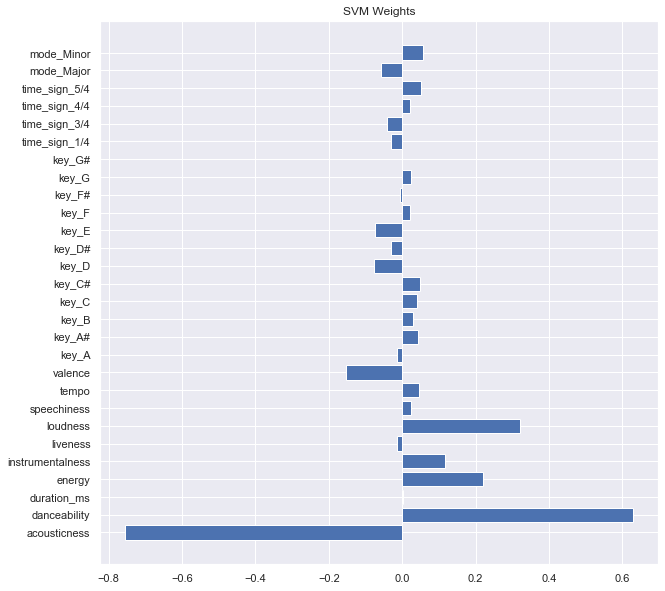

In [ ]:
print("w: ", w)
print("b: ", b)
print("\n+ CLASS:", np.sum(y_train==svm.classes_[1])/len(y_train))
print("- CLASS:", np.sum(y_train==svm.classes_[0])/len(y_train))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
var_idx = range(0,len(w))
ax.barh(var_idx, w, align='center')
ax.set_yticks(var_idx)
ax.set_yticklabels(X.columns)
plt.title("SVM Weights")
plt.show()

## Observations on Linear SVC feature weights:

The previous bar chart of the feature weights allows to observe that in determining wether a track is Electronic or Classical there are two main contributors to the model: *acousticness* (with a negative weight) and *danceability*. In this case it is clear that **Electronic** is defined by *danceability, loudness and energy* while **Classical** is mainly characterized as *very acoustic and with more valence*. 

## Finding best parameters for Non-Linear SVM with GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV
base = SVC()

grid_values = {'C': np.logspace(-10, 5, num=32, endpoint=True, base=2.0), 'kernel': ['rbf','poly', 'sigmoid'], 'gamma':[0.001, 0.01]}
grid_search_svc = GridSearchCV(base, param_grid = grid_values, scoring = 'accuracy', cv=5)
#Fitting the model
print("Fitting the model: ")
print("\n")
grid_search_svc.fit(X_train, y_train)
# Extracting best params
best_params = grid_search_svc.best_params_

print("The best params are: ", best_params)


Fitting the model: 


The best params are:  {'C': 32.0, 'gamma': 0.01, 'kernel': 'rbf'}


## Initializing Non-Linear SVM with the best parameters

In [ ]:
from sklearn.svm import SVC

nonlin_svc = SVC(C=10, kernel='rbf') # using non-linear kernel
nonlin_svc.fit(X_train, y_train) # training the model

y_pred_train_nl = nonlin_svc.predict(X_train)
y_pred_test_nl = nonlin_svc.predict(X_test)

print("\n")

print("Accuracy Train: %.2f"%(np.sum(y_pred_train_nl==y_train)/len(y_train)))
print("Accuracy Test: %.2f"%(np.sum(y_pred_val_nl==y_val)/len(y_val)))

print("\n")



Accuracy Train: 0.96
Accuracy Validation: 0.94




To find the optimal type of non-linear kernel and regularization C parameter will do a Grid Search:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

base = SVC()

grid_values = {'kernel': ['poly', 'rbf'],
               'C': [0.001,0.01,0.1,1,10],
              }
grid_search_svc = GridSearchCV(base, param_grid = grid_values, scoring = 'accuracy')
#Fitting the model
print("Fitting the model: ")
print("\n")
grid_search_svc.fit(X_train, y_train)
# Extracting best params
best_params = grid_search_svc.best_params_

print("The best params are: ", best_params)


Fitting the model: 


The best params are:  {'C': 10, 'kernel': 'rbf'}


Will therefore use the previous information to train a new model with the optimal parameters found:

In [ ]:
best_nl_svc = SVC(kernel='rbf', C=10)
best_nl_svc.fit(X_train, y_train)

best_train_preds = best_nl_svc.predict(X_train)
best_test_preds = best_nl_svc.predict(X_test)

print("Accuracy Train: %.2f"%(np.sum(best_train_preds==y_train)/len(y_train)))
print("Accuracy Test: %.2f"%(np.sum(best_test_preds==y_test)/len(y_test)))

Accuracy Train: 0.97
Accuracy Test: 0.95


The confusion matrix for the test set is:

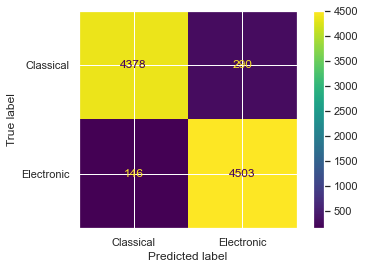

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_nl_svc, X_test, y_test, display_labels=selected_genres)

The SVM does pretty well at predicting both Classical and Electronic genres with only about 5% of the data misclassified by the model. 

# **Support for Multiples Clases**

Here I provide some basic code to handle multiple classes. Execute all the previous in the sections "Data", "Data Download" and "Exploratory Data Analysis". In particular be sure you select the genres/classes you want to classify in the section "Select a Subset of Genres"

**Activities:**

Train SVMs to classify songs of the following 5 genres: Classical, Electronic,  Jazz,  Rock,  Rap.

1.   Use a linear soft-margin SVM selecting the optimal value of the regularization parameter $C$.
2.   Use a non-linear SVM selecting a good kernel.
3.   Evaluate the classifiers estimating the confusion matrix.
4.   Plot the weight of the different audio attributes for each binary sub-model. Discuss the results. 


### OVR (One versus the Rest)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import f1_score, recall_score, precision_score

model_to_set = SVC(decision_function_shape='ovr')

grid_values = {'kernel': ['linear'], 'C':[0.001,0.01,0.1,1,10]}

grid_search_ovr = GridSearchCV(model_to_set, param_grid = grid_values, scoring = 'accuracy')

#Fitting the model
print("Fitting the model: ")
print("\n")
grid_search_ovr.fit(X_train, y_train)
# Extracting best params
best_params = grid_search_ovr.best_params_

print("The best params are: ", best_params)


Fitting the model: 


The best params are:  {'C': 10, 'kernel': 'linear'}


Having found the best parameters for the OVR go ahead and initialize a new OVR classifier:

**As we have been working with Cross-Validation, will leave the validation steps out**

N CLASSES = 5


Train/Val/Test Accuracy Multiclass (via OVR)

0.6441238352870454 0.6392288204731847


[[0.80623365 0.14363557 0.01569311 0.03291194 0.00152572]
 [0.09190466 0.76830578 0.04187245 0.06764011 0.030277  ]
 [0.13602015 0.20759866 0.18975651 0.26049538 0.2061293 ]
 [0.20347714 0.18737927 0.03391286 0.54732775 0.02790298]
 [0.00541008 0.04847436 0.01060377 0.03613936 0.89937243]]


Precision (Macro, Micro) 0.6418358931471921 0.6392288204731847
Recall (Macro, Micro) 0.6421992238684123 0.6392288204731847
F1 (Macro, Micro) 0.610294448184171 0.6392288204731847


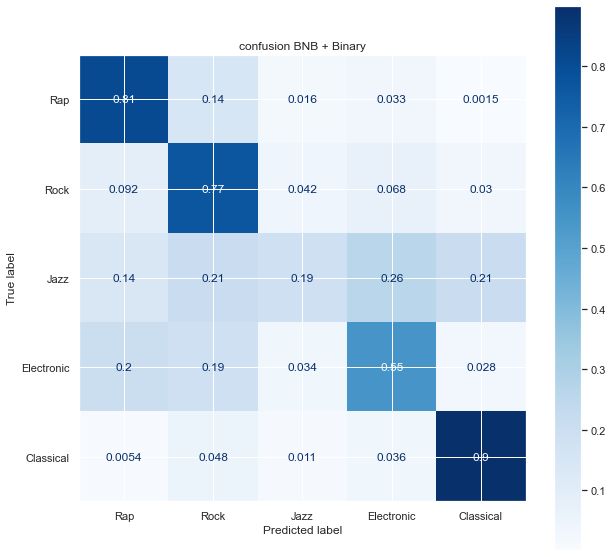

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.svm import SVC
base = SVC(kernel='linear', C=10)

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max

print("N CLASSES = %d\n"%n_classes)

clf = OneVsRestClassifier(base).fit(X_train.values, y_train.values)

train_acc = clf.score(X_train.values, y_train.values)
# val_acc = clf.score(X_val.values, y_val.values)
test_acc = clf.score(X_test.values, y_test.values)

print("\nTrain/Val/Test Accuracy Multiclass (via OVR)\n")
print(train_acc, test_acc)

print("\n")
fig, ax = plt.subplots(figsize=(10, 10))
labels = [number_to_genre[clf.classes_[idx]] for idx in range(n_classes)]
disp = plot_confusion_matrix(clf, X_test.values,y_test.values, display_labels=labels, cmap=plt.cm.Blues,normalize='true',ax=ax)
disp.ax_.set_title("confusion BNB + Binary")

print(disp.confusion_matrix)


y_pred_test = clf.predict(X_test.values)
macro_prec = precision_score(y_test, y_pred_test, average='macro')
micro_prec = precision_score(y_test, y_pred_test, average='micro')

macro_recall = recall_score(y_test, y_pred_test, average='macro')
micro_recall = recall_score(y_test, y_pred_test, average='micro')

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
micro_f1 = f1_score(y_test, y_pred_test, average='micro')

print("\n")
print("Precision (Macro, Micro)", macro_prec, micro_prec)
print("Recall (Macro, Micro)", macro_recall, micro_recall)
print("F1 (Macro, Micro)", macro_f1, micro_f1)


Apparently it is very hard for the SVM to predict the Jazz genre. This makes sense as it is characterized by diverse time signatures, key and other variables.


#### Feature Weights



Coefficients SVM + OVR



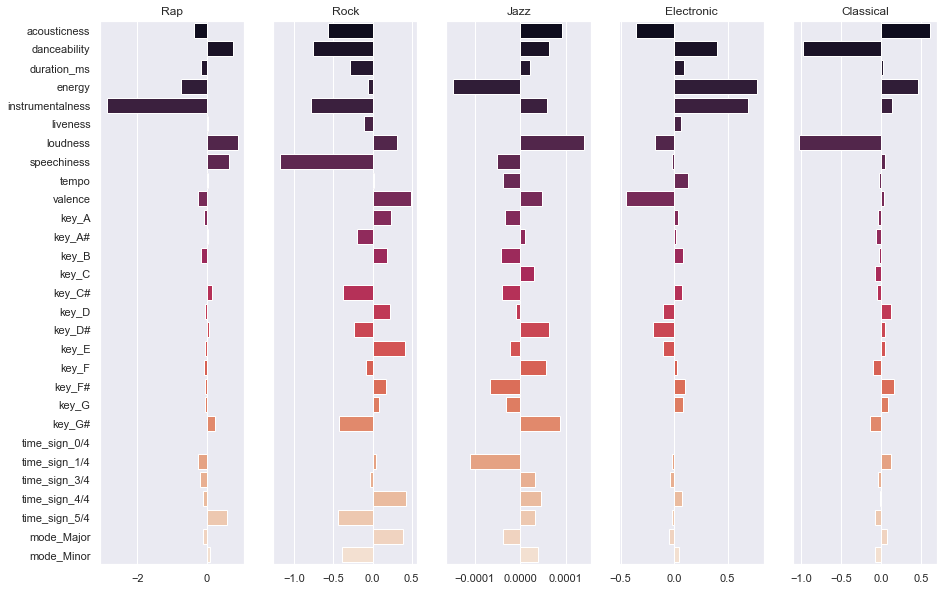

In [ ]:
from sklearn.svm import SVC

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max

print("\nCoefficients SVM + OVR\n")

base = SVC(kernel='linear', C=1)
clf = OneVsRestClassifier(base).fit(X_train.values, y_train.values)

fig, axes = plt.subplots(figsize=(15,10),nrows=1,ncols=len(clf.estimators_),sharex=False,sharey=True,squeeze=False)

for idx,estimator in enumerate(clf.estimators_):
  w = estimator.coef_
  b = estimator.intercept_

  max_feat = min(len(w[0,:]),30)

  sns.barplot(y=np.arange(max_feat),x=w[0,:max_feat],palette="rocket",ax=axes[0,idx%5],orient="h")
  axes[0,idx%5].set_yticklabels(X.columns[:max_feat])
  axes[0,idx%5].set_title('%s'%number_to_genre[clf.classes_[idx]])
  
plt.show()


## Observations on Multiclass Linear OVR feature weights:

In this case we can consider the weights of the model as the importance of the features in determining the genre. For **electronic** music for example we can see how *energy and instrumentalness* as well as *danceability* are the three more contributing variables. What the model seems to consider uncharacteristic of electronic music (given the negative weights it assigned) is acousticness and valence, which holds true in real-life. 

## Will use the OVO classifier to address the case of Non-Linear SVM by first finding an optimal C parameter:

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

model_to_set = SVC(decision_function_shape='ovo')

grid_values = {'kernel': ['rbf', 'poly'], 'C':[0.001,0.01,0.1,1,10]}

grid_search_ovo = GridSearchCV(model_to_set, param_grid = grid_values, scoring = 'accuracy')

#Fitting the model
print("Fitting the model: ")
print("\n")
grid_search_ovo.fit(X_train, y_train)
# Extracting best params
best_params = grid_search_ovo.best_params_

print("The best params are: ", best_params)


Fitting the model: 


The best params are:  {'C': 1, 'kernel': 'rbf'}


## OVO (One versus One)

0.7455021684056851 0.7215852977800679
 ---- 




Precision (Macro, Micro) 0.7245146892888747 0.7215852977800679
Recall (Macro, Micro) 0.7225511089910985 0.7215852977800679
F1 (Macro, Micro) 0.7215233059375801 0.7215852977800679


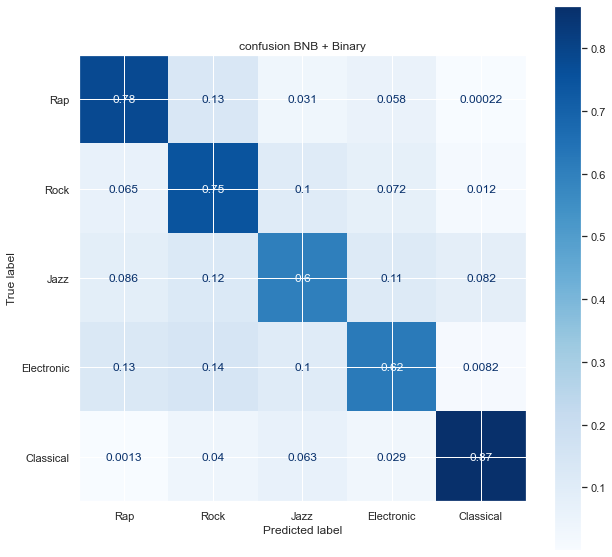

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max

base = SVC(kernel='rbf', C=1)
clf = OneVsOneClassifier(base).fit(X_train.values, y_train.values)

train_acc = clf.score(X_train.values, y_train.values)
# val_acc = clf.score(X_val.values, y_val.values)
test_acc = clf.score(X_test.values, y_test.values)

print(train_acc,test_acc)
print(" ---- ")

print("\n")
fig, ax = plt.subplots(figsize=(10, 10))
labels = [number_to_genre[clf.classes_[idx]] for idx in range(n_classes)]
disp = plot_confusion_matrix(clf, X_test.values,y_test.values, display_labels=labels, cmap=plt.cm.Blues,normalize='true',ax=ax)
disp.ax_.set_title("confusion BNB + Binary")

#print(disp.confusion_matrix)

y_pred_test = clf.predict(X_test.values)
macro_prec = precision_score(y_test, y_pred_test, average='macro')
micro_prec = precision_score(y_test, y_pred_test, average='micro')

macro_recall = recall_score(y_test, y_pred_test, average='macro')
micro_recall = recall_score(y_test, y_pred_test, average='micro')

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
micro_f1 = f1_score(y_test, y_pred_test, average='micro')

print("\n")
print("Precision (Macro, Micro)", macro_prec, micro_prec)
print("Recall (Macro, Micro)", macro_recall, micro_recall)
print("F1 (Macro, Micro)", macro_f1, micro_f1)

In this case we can see a higher accuracy with respect to the OneVsRest linear model. This is likely attributed to the model being better able to predict the Jazz genre, improving from 0.19 correct predictions to 0.6 correct predictions. 

Feature weights on the other hand cannot be calculated with a Non-linear approach. a

## Conclusions

The linear SVC was able to classify very well the two selected genres ['Classical', 'Electronic'] with a 94% accuracy. A non-linear SVM obtained a slightly better accuracy of 95%.  To achieve this, the best C parameter was found through Cross Validation to be very near to zero in the case of linear SVM and of 10 when using non-linear kernels. 

The **main features** in determining classical music where acousticness and valence. In the case of Electronic music they were danceability, loudness and energy. In other words, the model was able to detect this pattern in the training data, which being large enough was able to give a representative input of these genres. 

Moreover, in the multiclass case the **linear OVR** obtained a much lower accuracy of 63.9%. It is relevant to point out that the model found specially difficult to classify the Jazz genre with only 19% of correct predictions. The **non-linear OVO** performed better with accuracy of 72.15% driven by the model's better ability to classify the Jazz genre. 